# t-SNE

t-SNE（t-分布随机邻域嵌入）是一种常用于机器学习和数据可视化的降维技术。它有效地在较低维度空间中可视化高维数据，突显数据点之间的局部关系。

> [t-SNE：最好的降维方法之一](https://zhuanlan.zhihu.com/p/64664346)
> [t-SNE 原理及Python实例](https://zhuanlan.zhihu.com/p/148170862)
> [通俗理解一个常用的降维算法(t-SNE)](https://cloud.tencent.com/developer/article/1549992)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
from tensorflow.keras.models import load_model
import cv2
import seaborn as sns

# Display
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm

2023-12-01 09:43:44.195994: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
## Useful functions
os.chdir('../')
from Utils.Utils_colab import *

In [3]:
hdf5_path = './test_data/V12_YOLO_par_3_9600.hdf5'

X_train, X_dev, X_test, Y_train, Y_dev, Y_test = load_dataset_train_dev_test(hdf5_path)


In [4]:
################ Confirming data retrieved shapes ###############

#Standardizing training data
#X_train_std = standardize_x_array(X_train)
#X_dev_std = standardize_x_array(X_dev)
#X_test_std = standardize_x_array(X_test)

##### to rgb
X_train = gray_to_rgb(X_train)
X_dev = gray_to_rgb(X_dev)
X_test = gray_to_rgb(X_test)

print("X_train shape : " + str(X_train.shape), "X_dev shape : " + str(X_train.shape), "X_test shape : " + str(X_train.shape)) 
print("Y_train shape : " + str(Y_train.shape), "Y_dev par shape : " + str(Y_dev.shape), "Y_test par shape : " + str(Y_test.shape)) 

X_train shape : (6720, 64, 64, 3) X_dev shape : (6720, 64, 64, 3) X_test shape : (6720, 64, 64, 3)
Y_train shape : (6720, 4) Y_dev par shape : (1920, 4) Y_test par shape : (960, 4)


In [5]:
from keras import backend as K

def r2(y_true, y_pred):

    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    
    return ( 1 - SS_res/(SS_tot + K.epsilon()))


In [6]:
load_path = "./test_data/Densenet/Densenet_par_8_TL.hdf5"

best_model = load_model(load_path, custom_objects={'r2': r2})

best_model.summary()

2023-12-01 09:43:48.255533: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-12-01 09:43:48.256813: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-12-01 09:43:48.267207: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:02:00.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.89GiB deviceMemoryBandwidth: 681.88GiB/s
2023-12-01 09:43:48.267471: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID: 0000:03:00.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.89GiB deviceMemoryBandwidth: 681.88GiB/s
2023-12-01 09:43:48.267499: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 32, 32, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 32, 32, 64)   256         conv1/conv[0][0]                 
_______________________________________________________________________________________

In [7]:
i=0
for layer in best_model.layers:
  
 print(f"{i}: {layer.name}")
 i+=1

0: input_1
1: zero_padding2d
2: conv1/conv
3: conv1/bn
4: conv1/relu
5: zero_padding2d_1
6: pool1
7: conv2_block1_0_bn
8: conv2_block1_0_relu
9: conv2_block1_1_conv
10: conv2_block1_1_bn
11: conv2_block1_1_relu
12: conv2_block1_2_conv
13: conv2_block1_concat
14: conv2_block2_0_bn
15: conv2_block2_0_relu
16: conv2_block2_1_conv
17: conv2_block2_1_bn
18: conv2_block2_1_relu
19: conv2_block2_2_conv
20: conv2_block2_concat
21: conv2_block3_0_bn
22: conv2_block3_0_relu
23: conv2_block3_1_conv
24: conv2_block3_1_bn
25: conv2_block3_1_relu
26: conv2_block3_2_conv
27: conv2_block3_concat
28: conv2_block4_0_bn
29: conv2_block4_0_relu
30: conv2_block4_1_conv
31: conv2_block4_1_bn
32: conv2_block4_1_relu
33: conv2_block4_2_conv
34: conv2_block4_concat
35: conv2_block5_0_bn
36: conv2_block5_0_relu
37: conv2_block5_1_conv
38: conv2_block5_1_bn
39: conv2_block5_1_relu
40: conv2_block5_2_conv
41: conv2_block5_concat
42: conv2_block6_0_bn
43: conv2_block6_0_relu
44: conv2_block6_1_conv
45: conv2_block

In [8]:
layer_to_plot = 141
best_model.layers[layer_to_plot]

layer_outputs = K.function([best_model.layers[0].input], outputs=[best_model.layers[layer_to_plot].output])

In [9]:
layer_output_train = layer_outputs([X_train[:]])[0]
layer_output_dev = layer_outputs([X_dev[:]])[0]
layer_output_test = layer_outputs([X_test[:]])[0]

2023-12-01 09:43:51.091078: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 330301440 exceeds 10% of free system memory.
2023-12-01 09:43:51.384900: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2023-12-01 09:43:52.526165: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


这段代码使用Scikit-learn中的t-SNE（TSNE类）对三组数据进行降维，其中数据分别为`layer_output_train`、`layer_output_dev`和`layer_output_test`。具体而言：

1. `TSNE(n_components=2, init='pca', n_iter=3000)` 创建了一个t-SNE对象，指定输出的维度为2，初始化方法为PCA，迭代次数为3000次。
2. `tsne.fit_transform(layer_output_train)` 对训练数据进行t-SNE降维，结果存储在`P1_tsne`中。
3. 同理，对开发集数据和测试集数据进行降维，结果分别存储在`P2_tsne`和`P3_tsne`中。

将高维的特征表示映射到二维空间，以便于可视化。

In [11]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='pca', n_iter=3000)
P1_tsne = tsne.fit_transform(layer_output_train)
P2_tsne = tsne.fit_transform(layer_output_dev)
P3_tsne = tsne.fit_transform(layer_output_test)

这段代码定义了一个名为`scale_to_01_range`的函数，并使用该函数对经过t-SNE转换得到的x和y坐标进行了缩放和平移，使它们适应于[0; 1]范围。具体解释如下：

1. `scale_to_01_range` 函数接受一个数组 `x` 作为输入。
2. 计算分布范围 (`value_range`)，方法是找到 `x` 中最大值和最小值之间的差异。
3. 移动分布，使其从零开始，方法是从所有值中减去最小值 (`starts_from_zero`)。
4. 最后，通过将每个值除以计算的范围，将分布缩放到适应 [0; 1] 范围。

在定义了这个函数之后，它被用于对x和y坐标（`tx`和`ty`）进行处理，这些坐标是通过t-SNE转换获得的。

In [12]:
# scale and move the coordinates so they fit [0; 1] range
def scale_to_01_range(x):
    # compute the distribution range
    value_range = (np.max(x) - np.min(x))

    # move the distribution so that it starts from zero
    # by extracting the minimal value from all its values
    starts_from_zero = x - np.min(x)

    # make the distribution fit [0; 1] by dividing by its range
    return starts_from_zero / value_range

# extract x and y coordinates representing the positions of the images on T-SNE plot
tx = P2_tsne[:,0]
ty = P2_tsne[:,1]

tx = scale_to_01_range(tx)
ty = scale_to_01_range(ty)

这段代码创建了一个标签数组 `label`，根据 `Y_dev` 中的值进行映射。具体而言：

- `Y_dev[:,-1]` 提取了 `Y_dev` 中的最后一列。
- `(Y_dev[:,-1]+1).astype(str)` 将提取的列的值加1并转换为字符串类型。
- 然后通过一系列条件语句，将不同的字符串值映射到相应的标签。例如，如果字符串值为 '1.0'，则将其映射为 "r: 0.1m, h: 1m"。

用于为可视化添加标签，以便更好地理解和解释数据。

In [13]:
label = (Y_dev[:,-1]+1).astype(str).copy()

label[label == '1.0'] = "r: 0.1m, h: 1m"
label[label == '2.0'] = "r: 0.1m, h: 1.2m"
label[label == '3.0'] = "r: 0.1m, h: 1.4m"
label[label == '4.0'] = "r: 0.1m, h: 1.6m"
label[label == '5.0'] = "r: 0.12m, h: 1m"
label[label == '6.0'] = "r: 0.12m, h: 1.2m"
label[label == '7.0'] = "r: 0.12m, h: 1.4m"
label[label == '8.0'] = "r: 0.12m, h: 1.6m"
label[label == '9.0'] = "r: 0.14m, h: 1m"
label[label == '10.0'] = "r: 0.14m, h: 1.2m"
label[label == '11.0'] = "r: 0.14m, h: 1.4m"
label[label == '12.0'] = "r: 0.14m, h: 1.6m"
label[label == '13.0'] = "r: 0.16m, h: 1m"
label[label == '14.0'] = "r: 0.16m, h: 1.2m"
label[label == '15.0'] = "r: 0.16m, h: 1.4m"
label[label == '16.0'] = "r: 0.16m, h: 1.6m"

这段代码使用`seaborn`和`matplotlib`创建了一个包含三个子图的散点图，用于可视化t-SNE转换后的数据。以下是代码中的一些关键点：

- `fig, axs = plt.subplots(1, 3, figsize=(30,10))` 创建了一个包含三个子图的图形，每个子图的大小为(30,10)。
- `sns.scatterplot` 用于创建散点图。例如，`train`、`val` 和 `test` 分别对应于训练、验证和测试数据的散点图。
- `hue=Y_train[:,-1]+1`、`hue=Y_dev[:,-1]+1` 和 `hue=Y_test[:,-1]+1` 通过指定`hue`参数，将数据点按类别着色。
- `palette="deep"` 和 `cmap='rainbow'` 分别指定了颜色调色板和颜色映射。

最后，通过 `plt.savefig('./TSNE/tsne_val.pdf', dpi=200)` 将图形保存为PDF文件。



/share/anaconda3/envs/tensorflow/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/share/anaconda3/envs/tensorflow/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/share/anaconda3/envs/tensorflow/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/share/anaconda3/envs/tensorflow/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

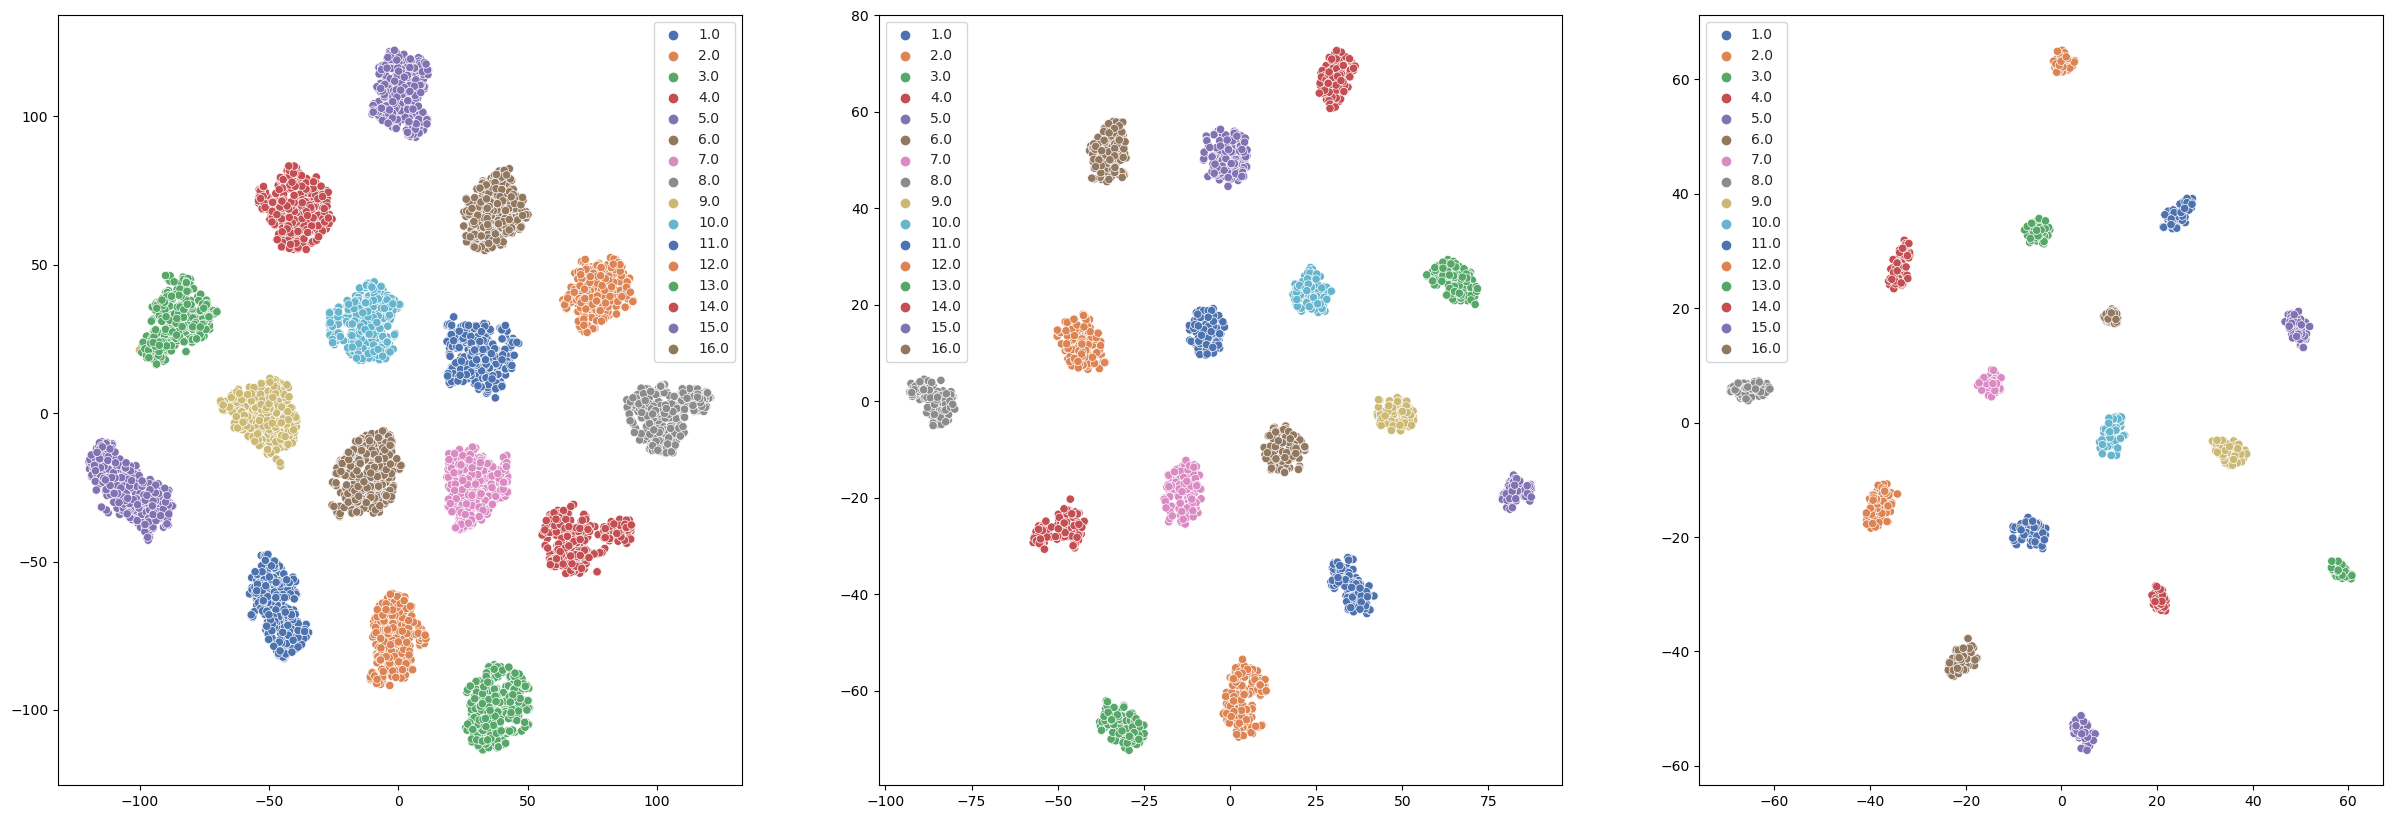

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(30,10))

sns.set_style("white")

#sns.set(font_scale=0.9)
#sns.set_context("poster", font_scale=1)

#fontsize = 25
#axs.tick_params(labelsize=20)
#axs[1].tick_params(labelsize=fontsize)
#axs[2].tick_params(labelsize=fontsize)

#plot_1 = axs[0].scatter(P1_tsne[:,0],P1_tsne[:,1], cmap='rainbow', c=Y_train[:,3], marker='.')
train = sns.scatterplot(x=P1_tsne[:,0],y=P1_tsne[:,1], hue=Y_train[:,-1]+1, ax=axs[0], palette="deep", cmap='rainbow')
#axs.set_title('Train')
#axs[0].legend(*plot_1.legend_elements(), title="Classes")

#plot_2 = axs[1].scatter(P2_tsne[:,0],P2_tsne[:,1], cmap='hsv', c=Y_dev[:,-1:], marker='x')
val = sns.scatterplot(x=P2_tsne[:,0],y=P2_tsne[:,1], hue=Y_dev[:,-1]+1, ax=axs[1], palette="deep", cmap='rainbow')
#axs.set_title('Validation')
#axs[1].legend(*plot_2.legend_elements(), title="Classes")

#plot_3 = axs[2].scatter(P3_tsne[:,0],P3_tsne[:,1], cmap='hsv', c=Y_test[:,-1:], marker='*')
test = sns.scatterplot(x=P3_tsne[:,0], y=P3_tsne[:,1], hue=Y_test[:,-1]+1, ax=axs[2], palette="deep", cmap='rainbow')
#axs.set_title('Validation set', fontsize=20)
#axs[2].legend(*plot_3.legend_elements(), title="Classes")

#test.legend(loc='best', bbox_to_anchor=(0.99, 0.5), ncol=8, fontsize=23)

#plt.legend([],[], frameon=False)

plt.savefig('./TSNE/tsne_val.pdf', dpi=200)